<a href="https://colab.research.google.com/github/kareembadrsaber/electropi.ai_projects/blob/master/Sentiment_Analysis_on_Social_Media_Posts_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Sentiment-Analysis-on-Social-Media-Posts-with-LSTM**

---



**Sentiment Analysis on Social Media Posts with LSTM**

In this project, we'll dive into the captivating domain of sentiment analysis using Long Short-Term Memory (LSTM) neural networks. Our goal is to develop a robust LSTM model capable of discerning sentiment from text data, particularly from social media posts, customer reviews, or news articles.

We'll embark on our journey by delving into a comprehensive dataset of text data, such as the Sentiment140 dataset or the Amazon Reviews dataset. Through rigorous exploratory data analysis (EDA), we'll uncover valuable insights into the nuances of sentiment present in the data. This exploration will involve analyzing correlations between different features and addressing any outliers or missing values encountered along the way.

Next, we'll preprocess the dataset, meticulously splitting it into training and testing sets. Leveraging advanced techniques like tokenization or word embeddings, we'll transform the raw text data into meaningful input vectors ready for LSTM model consumption.

With our data prepared, we'll set out to construct a powerful LSTM model using cutting-edge deep learning frameworks like PyTorch or Tensorflow. Throughout the model-building process, we'll experiment with various neural network architectures, activation functions, and learning rates to uncover the most effective combination for our sentiment analysis task.

Finally, armed with our trained LSTM model, we'll evaluate its performance using a battery of metrics such as accuracy, precision, recall, and F1 score. By visualizing the results through techniques like confusion matrices, we'll gain valuable insights into how well our model performs across different sentiment classes.

**Dataset URLs:**

The Sentiment140 dataset comprises 1.6 million tweets categorized into 6 different sentiment classes, including positive, negative, neutral, and three additional classes. Sentiment140 dataset
The Amazon Reviews dataset boasts 3.6 million reviews classified into binary sentiment classes:

positive or negative. Amazon Reviews dataset

**Advantages of Using LSTM:**

**Long-Term Dependency Handling:** LSTM networks are capable of capturing long-term dependencies in sequential data, making them well-suited for analyzing text with complex structures.

**Ability to Remember Information:** LSTM cells have a memory component that allows them to retain information over extended periods, enabling the model to learn from past experiences and make informed predictions.

**Effective Handling of Sequences**: LSTM networks excel in processing sequences of data, making them ideal for tasks like sentiment analysis, where the order of words matters.

**Versatility in Input Length:** Unlike traditional feedforward neural networks, LSTM networks can process input sequences of variable lengths, offering flexibility in handling text data of varying sizes.

**Disadvantages of Using LSTM**:

**Computationally Intensive:** Training LSTM models can be computationally expensive, especially when dealing with large datasets or complex network architectures.

**Potential for Overfitting:** LSTM networks are prone to overfitting, particularly when trained on small datasets or when the model architecture is overly complex. Regularization techniques are often required to mitigate this risk.

**Difficulty in Interpretability:** Interpreting the inner workings of LSTM models can be challenging due to their complex architecture and the abstract nature of the learned representations.

**Training Sensitivity:** LSTM networks are sensitive to the choice of hyperparameters, including learning rate, batch size, and optimizer, requiring careful tuning to achieve optimal performance.

# This code snippet checks if a GPU is available for use with TensorFlow. Utilizing a GPU for computation can significantly accelerate training and inference processes, especially for deep learning models like the LSTM model we're building for sentiment analysis. Verifying GPU availability helps ensure that we can leverage hardware acceleration to enhance the efficiency and speed of our model training.


In [1]:
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU is not available


### **Data Acquisition**

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [4]:
uploaded = files.upload()
uploaded

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"kimobadr","key":"ec5b0baaf6ecadfc621ccbaf1c866bef"}'}

In [5]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

In [6]:
!kaggle datasets download -d bittlingmayer/amazonreviews

100% 493M/493M [00:09<00:00, 66.9MB/s]
100% 493M/493M [00:09<00:00, 55.7MB/s]


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
import pandas as pd

In [10]:
!unzip -q /content/amazonreviews.zip -d /content/dataset

In [11]:

# Read the dataset file
try:
    df_train = pd.read_csv('dataset/train.ft.txt.bz2', delimiter='\t', header=None, names=['text', 'label']).sample(100000)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")

# Display the first few rows of the DataFrame
print(df_train.head())


Dataset loaded successfully.
                                                      text  label
3356308  __label__1 Read the damned description: So her...    NaN
3102966  __label__2 I like it: but it's not very durabl...    NaN
3596578  __label__1 Stopped working: I really liked the...    NaN
3289626  __label__1 Sub-Par: Quality was not consistent...    NaN
2460877  __label__2 Lovely romance: This was a really s...    NaN


**we have a problem in dataset, pandas read two column in one column**

In [12]:
df_train = pd.read_csv('dataset/train.ft.txt.bz2', delimiter='\t', header=None, names=['text', 'label']).sample(100000)
df_train.head()

,text,label
3291172,__label__1 Boring: My grand kids had no intere...,NaN
2988018,__label__1 first time: turned out to be just l...,NaN
28892,__label__1 jumanji: I brought this movie cause...,NaN
1381037,__label__2 An Entertaining Way to Spend an Aft...,NaN
927187,__label__2 Superb!: This is most certainly one...,NaN


In [13]:
row = '__label__1 Not an "ultimate guide": Firstly,I enjoyed the format and tone of the book (how the author addressed the reader). However, I did not feel that she imparted any insider secrets that the book promised to reveal. If you are just starting to research law school, and do not know all the requirements of admission, then this book may be a tremendous help. If you have done your homework and are looking for an edge when it comes to admissions, I recommend some more topic-specific books. For example, books on how to write your personal statment, books geared specifically towards LSAT preparation (Powerscore books were the most helpful for me), and there are some websites with great advice geared towards aiding the individuals whom you are asking to write letters of recommendation. Yet, for those new to the entire affair, this book can definitely clarify the requirements for you.'
label = [0 if row.split(' ')[0] == '__label__1' else 1]
label

[0]

In [14]:
text = ' '.join(row.split(' ')[1:])
text

'Not an "ultimate guide": Firstly,I enjoyed the format and tone of the book (how the author addressed the reader). However, I did not feel that she imparted any insider secrets that the book promised to reveal. If you are just starting to research law school, and do not know all the requirements of admission, then this book may be a tremendous help. If you have done your homework and are looking for an edge when it comes to admissions, I recommend some more topic-specific books. For example, books on how to write your personal statment, books geared specifically towards LSAT preparation (Powerscore books were the most helpful for me), and there are some websites with great advice geared towards aiding the individuals whom you are asking to write letters of recommendation. Yet, for those new to the entire affair, this book can definitely clarify the requirements for you.'

In [15]:
df_train['label'] = df_train['text'].apply(lambda row: 0 if row.split(' ')[0] == '__label__1' else 1)
df_train['text'] = df_train['text'].apply(lambda row: ' '.join(row.split(' ')[1:]))
df_train.head()

,text,label
3291172,"Boring: My grand kids had no interest, it wasn...",0
2988018,first time: turned out to be just like the one...,0
28892,jumanji: I brought this movie cause my son lov...,0
1381037,An Entertaining Way to Spend an Afternoon: Hav...,1
927187,Superb!: This is most certainly one of the mos...,1


# Read the test data

In [16]:
df_test = pd.read_csv(r'dataset/test.ft.txt.bz2', delimiter='\t', header=None, names=['text', 'label']).sample(20000)
df_test.head()

,text,label
28532,__label__1 History of Confusion: Who? What? Wh...,NaN
10784,__label__1 Gel Pens: The idea is great for the...,NaN
53661,__label__1 Awful first experience buying used:...,NaN
86641,"__label__2 Brings back old ""albums"": Good prod...",NaN
302930,__label__1 Look elsewhere if you're looking fo...,NaN


In [17]:
df_test['label'] = df_test['text'].apply(lambda row : 0 if row.split(' ')[0] == '__label__1' else 1)
df_test['text'] = df_test['text'].apply(lambda row : ' '.join(row.split(' ')[1:]))
df_test.head()

,text,label
28532,History of Confusion: Who? What? When? Why? Th...,0
10784,Gel Pens: The idea is great for these having t...,0
53661,Awful first experience buying used: I love the...,0
86641,"Brings back old ""albums"": Good product for the...",1
302930,Look elsewhere if you're looking for a rigorou...,0


### **Data Exploration**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3291172 to 2129623
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    100000 non-null  object
 1   label   100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 28532 to 73795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.8+ KB


In [21]:
df_train.duplicated().sum()

0

In [22]:
df_test.duplicated().sum()

0

<ipython-input-23-71dabd64ec80>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_train, palette=colors)


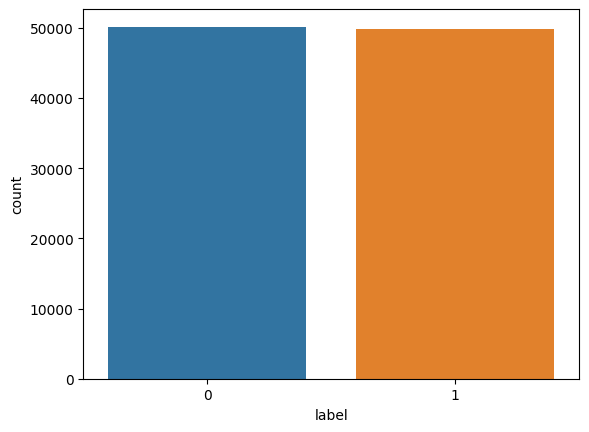

In [23]:
colors = ['#1f77b4', '#ff7f0e']
sns.countplot(x='label', data=df_train, palette=colors)
plt.show()

<ipython-input-24-438573f7545e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_test, palette=colors)


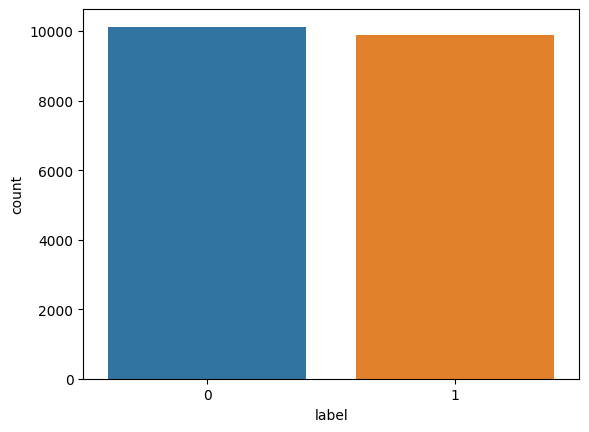

In [24]:
colors = ['#1f77b4', '#ff7f0e']
sns.countplot(x='label', data=df_test, palette=colors)
plt.show()

### **check text length**


In [25]:
df_train['text_length'] = df_train['text'].apply(len)
df_train.head()

,text,label,text_length
3291172,"Boring: My grand kids had no interest, it wasn...",0,177
2988018,first time: turned out to be just like the one...,0,170
28892,jumanji: I brought this movie cause my son lov...,0,359
1381037,An Entertaining Way to Spend an Afternoon: Hav...,1,468
927187,Superb!: This is most certainly one of the mos...,1,562


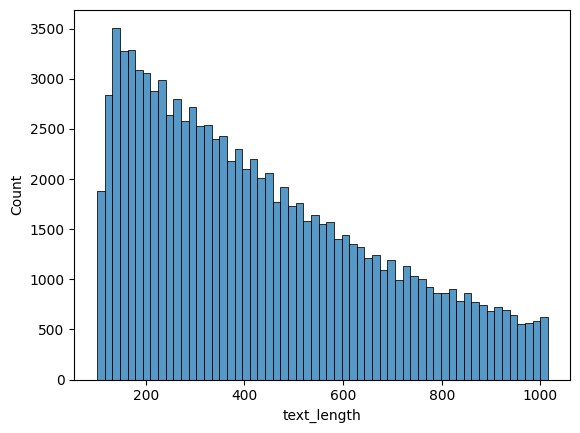

In [26]:
sns.histplot(df_train['text_length'])
plt.show()

**Knowing that most text samples are around 200 characters helps in setting up the model architecture, handling padding, and guiding feature engineering.**

In [27]:
df_test['text_length'] = df_test['text'].apply(len)
df_test.head()

,text,label,text_length
28532,History of Confusion: Who? What? When? Why? Th...,0,263
10784,Gel Pens: The idea is great for these having t...,0,148
53661,Awful first experience buying used: I love the...,0,424
86641,"Brings back old ""albums"": Good product for the...",1,186
302930,Look elsewhere if you're looking for a rigorou...,0,594


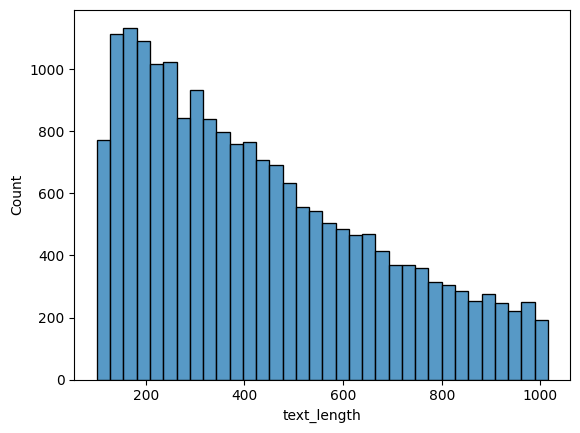

In [28]:
sns.histplot(df_test['text_length'])
plt.show()


**Exploring correlations between features** helps identify relationships and dependencies within the dataset. This analysis provides insights into how different variables interact with each other, which can inform feature selection, model building, and interpretation of results.

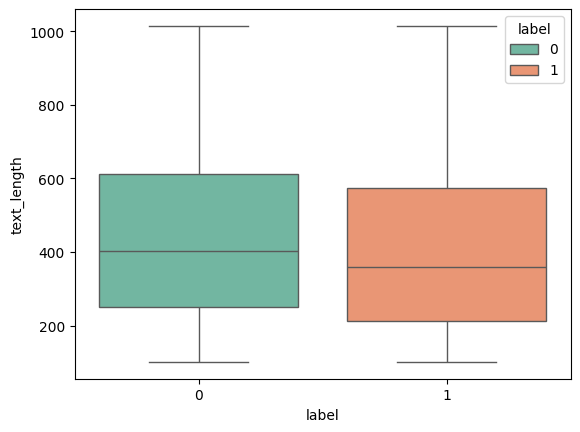

In [51]:
sns.boxplot(x='label', y='text_length', data=df_train, hue='label', palette='Set2')
plt.show()

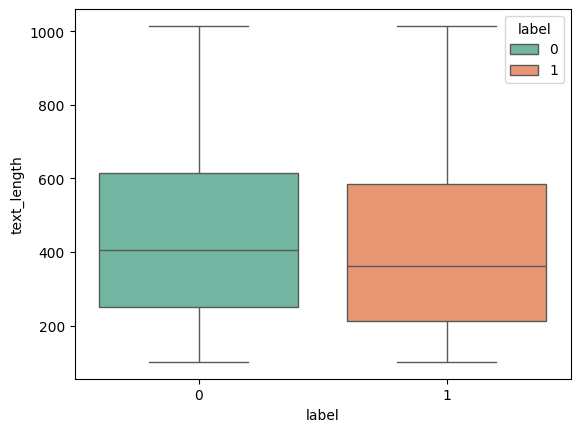

In [52]:
sns.boxplot(x='label', y='text_length', data=df_test, hue='label', palette='Set2')
plt.show()

**The analysis reveals that the majority of the text lengths in the dataset fall within the range of approximately 400 characters.**


## **Data Preparation**

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [32]:
def preprocess_text_series(series):
    # Regular expression substitutions
    series = series.str.replace('\d', '0')
    series = series.str.replace(r"([^ ]+(?<=\.[a-z]{3}))", "<url>")

    # Remove stop words and apply stemming and lemmatization
    stop_words = set(stopwords.words('english'))
    excluding = ['againts', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
                 "didn't",'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn',
                 "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't",
                 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

    stop_words = [word for word in stop_words if word not in excluding]

    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Tokenize the text
    words = series.str.split()

    # Remove stop words, apply stemming, and lemmatization
    filtered_words = [
        ' '.join([lemmatizer.lemmatize(ps.stem(word.lower())) for word in words if word.lower() not in stop_words])
        for words in words
    ]

    return filtered_words

In [33]:
# df_train['cleaned_text'] = df_train['text'].apply(preprocess_text)
df_train['cleaned_text'] = preprocess_text_series(df_train['text'])
df_train.head()

,text,label,text_length,cleaned_text
3291172,"Boring: My grand kids had no interest, it wasn...",0,177,"boring: grand kid interest, wasn't excit enoug..."
2988018,first time: turned out to be just like the one...,0,170,"first time: turn like one alreadi have, look s..."
28892,jumanji: I brought this movie cause my son lov...,0,359,jumanji: brought movi caus son love send dvd s...
1381037,An Entertaining Way to Spend an Afternoon: Hav...,1,468,entertain way spend afternoon: seen peter usti...
927187,Superb!: This is most certainly one of the mos...,1,562,superb!: certainli one interest novel ever com...


In [34]:
# df_test['cleaned_text'] = df_test['text'].apply(preprocess_text)
df_test['cleaned_text'] = preprocess_text_series(df_test['text'])
df_test.head()

,text,label,text_length,cleaned_text
28532,History of Confusion: Who? What? When? Why? Th...,0,263,histori confusion: who? what? when? why? quest...
10784,Gel Pens: The idea is great for these having t...,0,148,"gel pens: idea great varieti colors, however, ..."
53661,Awful first experience buying used: I love the...,0,424,"aw first experi buy used: love west wing, girl..."
86641,"Brings back old ""albums"": Good product for the...",1,186,"bring back old ""albums"": good product money. a..."
302930,Look elsewhere if you're looking for a rigorou...,0,594,look elsewher look rigor text.: like applic pr...


In [35]:
X_train, X_test, y_train, y_test = df_train['cleaned_text'], df_test['cleaned_text'], df_train['label'], df_test['label']
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (100000,)
X_test: (20000,)
y_train: (100000,)
y_test: (20000,)


In [36]:
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenizer

In [37]:
total_words = len(tokenizer.word_index) + 1
total_words

125134

In [38]:
maxlen = 100
X_train_sequences = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=maxlen)
print(X_train_sequences)

[[   0    0    0 ... 4700   28  787]
 [   0    0    0 ...  243   23 1214]
 [   0    0    0 ...   46  202   40]
 ...
 [   0    0    0 ...    1   56 1722]
 [   0    0    0 ...  913   10  485]
 [   0    0    0 ...  338  110  130]]


In [39]:
maxlen = 100
X_test_sequences = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=maxlen)
print(X_test_sequences)

[[   0    0    0 ... 1584 1804 6131]
 [   0    0    0 ... 6768    1  106]
 [   0    0    0 ... 5110 1311  641]
 ...
 [   0    0    0 ...   70    9 1820]
 [   0    0    0 ...   16   18    6]
 [   0    0    0 ...   31 2484  342]]


## **Build LSTM Model**

In [40]:
from tensorflow.keras import models, layers, optimizers
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [41]:
model = models.Sequential()
model.add(layers.Embedding(total_words, output_dim=64))
model.add(layers.LSTM(100))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          8008576   
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 8074677 (30.80 MB)
Trainable params: 8074677 (30.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Train the Model**

In [44]:
# Train the model
hist = model.fit(X_train_sequences,
          y_train,
          epochs=5,
          validation_data=(X_test_sequences, y_test))
hist

Epoch 1/5
3125/3125 [==============================] - 823s 262ms/step - loss: 0.3019 - accuracy: 0.8741 - val_loss: 0.2446 - val_accuracy: 0.9025
Epoch 2/5
3125/3125 [==============================] - 871s 279ms/step - loss: 0.2051 - accuracy: 0.9196 - val_loss: 0.2411 - val_accuracy: 0.9018
Epoch 3/5
3125/3125 [==============================] - 793s 254ms/step - loss: 0.1612 - accuracy: 0.9384 - val_loss: 0.2487 - val_accuracy: 0.8964
Epoch 4/5
3125/3125 [==============================] - 798s 255ms/step - loss: 0.1273 - accuracy: 0.9524 - val_loss: 0.2696 - val_accuracy: 0.8986
Epoch 5/5
3125/3125 [==============================] - 805s 258ms/step - loss: 0.0970 - accuracy: 0.9660 - val_loss: 0.3132 - val_accuracy: 0.8967


# **Displaying Metrics for trian and test set**

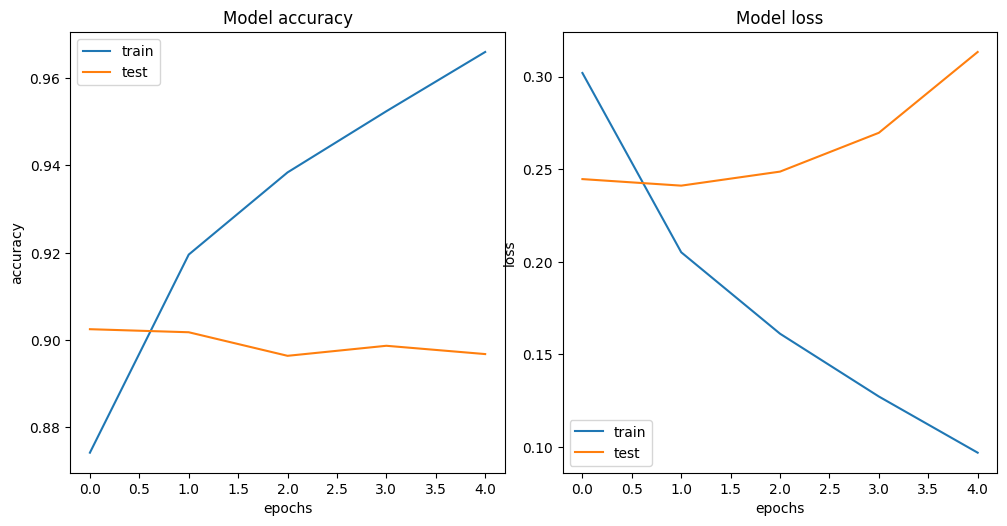

In [45]:
def show_metrics(hist):
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax = ax.ravel()
    plt.tight_layout()

    for i, metr in enumerate(['accuracy', 'loss']):
        ax[i].plot(hist.history[metr])
        ax[i].plot(hist.history['val_' + metr])
        ax[i].set_title(f'Model {metr}')
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(metr)
        ax[i].legend(['train', 'test'])

    plt.show()

show_metrics(hist)

### **Evaluate Model Performance**

In [46]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [47]:
preds = model.predict(X_test_sequences)
test_acc = np.round(accuracy_score(y_test, np.round(preds)) * 100, 2)
test_acc

625/625 [==============================] - 29s 46ms/step


89.68

In [48]:
train_acc = np.round((hist.history['accuracy'][-1] * 100, 2))[0]
train_acc

97.0

In [49]:
cr = classification_report(y_test, np.round(preds))
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90     10125
           1       0.88      0.92      0.90      9875

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



### **The confusion matrix**

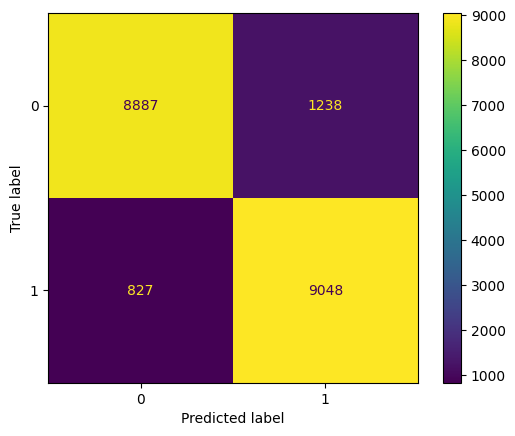

In [50]:
cm = confusion_matrix(y_test, np.round(preds))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

### **The confusion matrix:**
illustrates the performance of our sentiment analysis model, with true labels represented on the y-axis and predicted labels on the x-axis. In the top-left square, we have 8887 instances where the model correctly predicted negative sentiments (true negatives). The bottom-left square (827) indicates instances where the model incorrectly predicted negative sentiments (false negatives). On the top-right, we have 1238 false positives, where the model incorrectly predicted positive sentiments. Finally, the bottom-right square (9048) represents the instances where the model correctly predicted positive sentiments (true positives).

This breakdown provides valuable insights into the model's predictive accuracy across different sentiment classes, helping us understand where the model excels and where it may require further refinement. Additionally, the visualization of the confusion matrix allows for easy interpretation of the model's performance, highlighting areas of strength and areas for improvement.

### **Project Summary:**

Our project delves into sentiment analysis using LSTM neural networks, focusing on deciphering sentiment from text data sourced from social media posts. We begin with extensive exploratory data analysis to glean insights and preprocess the dataset for training. Leveraging LSTM models, we construct a sentiment analysis pipeline, experimenting with various architectures and hyperparameters to optimize performance. Through rigorous evaluation and visualization techniques like confusion matrices, we assess the model's effectiveness in discerning sentiment from text data. Our project not only provides practical experience in LSTM-based sentiment analysis but also underscores the importance of understanding and interpreting model performance metrics for real-world applications.